In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import




In [9]:
coords = np.load('data/tensor/ampc_TYM_0.pdb.npy')
coords.shape

(4, 42, 32, 32)

In [17]:
mapping ={'C': 0,
           'O': 1,
           'N': 2,
           'S': 3}

mapping_color ={'C': 'red',
           'O': 'blue',
           'N': 'green',
           'S': 'black'}

idxs = dict()
for atom, code in mapping.items():
    idxs[atom] = coords[code,:,:,:]>0
    print((coords[code,:,:,:]>0).shape)

# combine the objects into a single boolean array
voxels = np.sum(list(idxs.values()),axis=0)
print(voxels.shape)

(42, 32, 32)
(42, 32, 32)
(42, 32, 32)
(42, 32, 32)
(42, 32, 32)


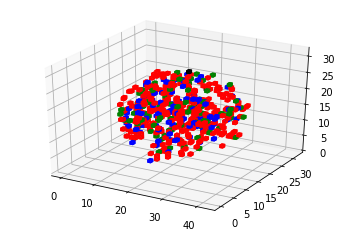

In [21]:
# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
for atom, color in mapping_color.items():
    colors[idxs[atom]]=color

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor=None)

plt.show()